In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(2)

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df1=df.isna().sum().reset_index()

In [7]:
df1.rename(columns={'index':'name',0:'na_values'},inplace=True)

In [8]:
df1['Percent_null']=df1['na_values']/df1.shape[0]

In [9]:
df1

,name,na_values,Percent_null
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
5,Age,177,14.750000
6,SibSp,0,0.000000
7,Parch,0,0.000000
8,Ticket,0,0.000000
9,Fare,0,0.000000


In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
import seaborn as sns

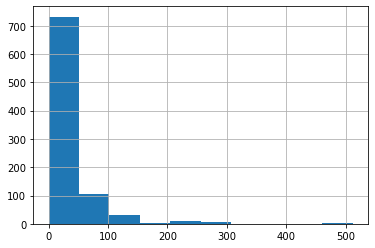

In [12]:
df['Fare'].hist()

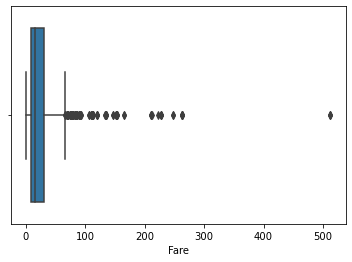

In [13]:
sns.boxplot(x='Fare',data=df)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


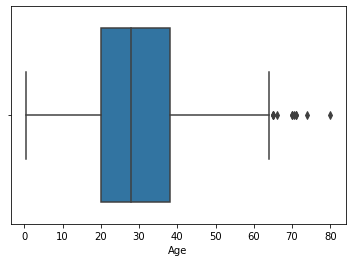

In [15]:
sns.boxplot(x='Age',data=df)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
df2=df[~df.isna()]

In [21]:
df2[['Sex','Age','SibSp','Fare']]

,Sex,Age,SibSp,Fare
0,male,22.0,1,7.2500
1,female,38.0,1,71.2833
2,female,26.0,0,7.9250
3,female,35.0,1,53.1000
4,male,35.0,0,8.0500
...,...,...,...,...
886,male,27.0,0,13.0000
887,female,19.0,0,30.0000
888,female,NaN,1,23.4500
889,male,26.0,0,30.0000


In [22]:
df3=pd.get_dummies(df2[['Sex','Age','SibSp','Fare']],drop_first=True)

In [23]:
df3.head()

,Age,SibSp,Fare,Sex_male
0,22.0,1,7.2500,1
1,38.0,1,71.2833,0
2,26.0,0,7.9250,0
3,35.0,1,53.1000,0
4,35.0,0,8.0500,1


In [24]:
df3['Age'].fillna(value=df3['Age'].median(),inplace=True)

In [25]:
df3.isna().sum()

Age         0
SibSp       0
Fare        0
Sex_male    0
dtype: int64

In [26]:
X_train,X_test,y_train,y_test=train_test_split(df3,df2['Survived'])

In [27]:
rfc=RandomForestClassifier()

In [28]:
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
pred_prob=rfc.predict_proba(X_test)

In [29]:
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,plot_roc_curve

In [30]:
confusion_matrix(pred,y_test)

array([[117,  28],
       [ 14,  64]], dtype=int64)

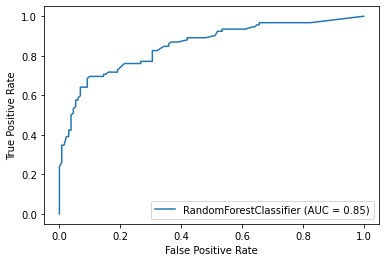

In [31]:
plot_roc_curve(rfc,X_test,y_test)